In [2]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

In [3]:
explanations_nbayes = pickle.load( open( "./comparison/explanations_nbayes.p", "rb" ) )
explanations_lreg = pickle.load( open( "./comparison/explanations_lreg.p", "rb" ) )

explanations_nbayes_top_10 = pickle.load( open( "./comparison/explanations_nbayes_top_10.p", "rb" ) )
explanations_lreg_top_10 = pickle.load( open( "./comparison/explanations_lreg_top_10.p", "rb" ) )

evaluation_lreg = pickle.load( open( "./comparison/evaluation_lreg.p", "rb" ) )
evaluation_nbayes = pickle.load( open( "./comparison/evaluation_nbayes.p", "rb" ) )

In [11]:
cosine_similarities_nbayes = []
cosine_similarities_lreg = []

for keys in explanations_nbayes.keys():
    cosine_similarities_nbayes.append(cosine_similarity(explanations_nbayes[keys]['lime'].reshape(1, -1), explanations_nbayes[keys]['shap'].reshape(1, -1))[0][0])
    cosine_similarities_lreg.append(cosine_similarity(explanations_lreg[keys]['lime'].reshape(1, -1), explanations_lreg[keys]['shap'].reshape(1, -1))[0][0])

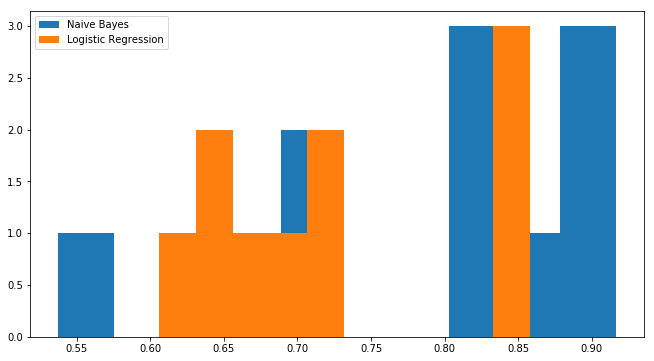

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(11, 6))

ax.hist(cosine_similarities_nbayes, label='Naive Bayes')
ax.hist(cosine_similarities_lreg, label='Logistic Regression')
ax.legend()

plt.show()

In [6]:
lime_method_1 = []
shap_method_1 = []
lime_method_2 = []
shap_method_2 = []

for keys in evaluation_lreg.keys():
    lime_method_1.append(evaluation_lreg[keys]['lime'][0])
    lime_method_2.append(evaluation_lreg[keys]['lime'][1])
    
    shap_method_1.append(evaluation_lreg[keys]['shap'][0])
    shap_method_2.append(evaluation_lreg[keys]['shap'][1])

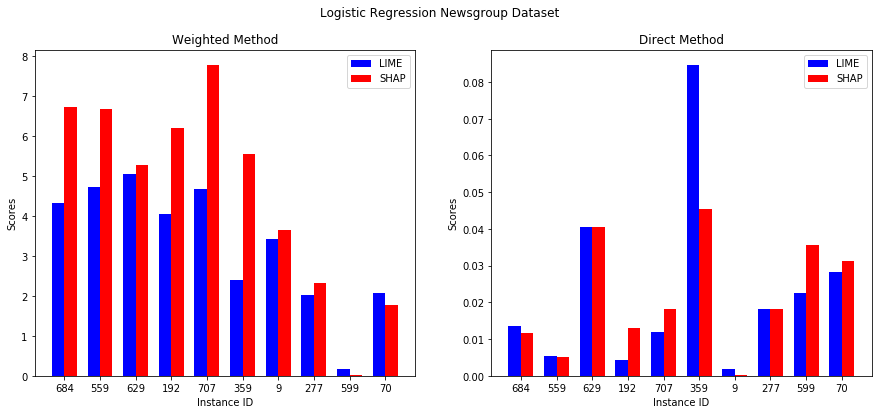

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

all_keys = evaluation_lreg.keys()
width = 0.35 

x = np.arange(len(all_keys)) 

rects1 = ax[0].bar(x - width/2, np.abs(lime_method_1), width, label='LIME', color='blue')
rects2 = ax[0].bar(x + width/2, np.abs(shap_method_1), width, label='SHAP', color='red')


ax[0].set_ylabel('Scores')
ax[0].set_xlabel('Instance ID')
ax[0].set_title('Weighted Method')
ax[0].set_xticks(x)
ax[0].set_xticklabels(all_keys)
ax[0].legend()

rects1 = ax[1].bar(x - width/2, np.abs(lime_method_2), width, label='LIME', color='blue')
rects2 = ax[1].bar(x + width/2, np.abs(shap_method_2), width, label='SHAP', color='red')

ax[1].set_xlabel('Instance ID')
ax[1].set_ylabel('Scores')
ax[1].set_title('Direct Method')
ax[1].set_xticks(x)
ax[1].set_xticklabels(all_keys)
ax[1].legend()

fig.suptitle('Logistic Regression Newsgroup Dataset')

plt.show()


In [9]:
lime_method_1 = []
shap_method_1 = []
lime_method_2 = []
shap_method_2 = []

for keys in evaluation_nbayes.keys():
    lime_method_1.append(evaluation_nbayes[keys]['lime'][0])
    lime_method_2.append(evaluation_nbayes[keys]['lime'][1])
    
    shap_method_1.append(evaluation_nbayes[keys]['shap'][0])
    shap_method_2.append(evaluation_nbayes[keys]['shap'][1])

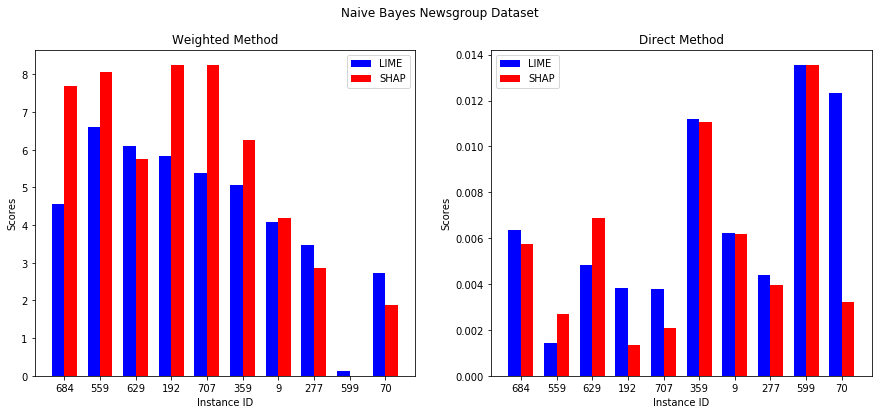

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

all_keys = evaluation_lreg.keys()
width = 0.35 

x = np.arange(len(all_keys)) 

rects1 = ax[0].bar(x - width/2, np.abs(lime_method_1), width, label='LIME', color='blue')
rects2 = ax[0].bar(x + width/2, np.abs(shap_method_1), width, label='SHAP', color='red')


ax[0].set_ylabel('Scores')
ax[0].set_xlabel('Instance ID')
ax[0].set_title('Weighted Method')
ax[0].set_xticks(x)
ax[0].set_xticklabels(all_keys)
ax[0].legend()

rects1 = ax[1].bar(x - width/2, np.abs(lime_method_2), width, label='LIME', color='blue')
rects2 = ax[1].bar(x + width/2, np.abs(shap_method_2), width, label='SHAP', color='red')

ax[1].set_xlabel('Instance ID')
ax[1].set_ylabel('Scores')
ax[1].set_title('Direct Method')
ax[1].set_xticks(x)
ax[1].set_xticklabels(all_keys)
ax[1].legend()

fig.suptitle('Naive Bayes Newsgroup Dataset')

plt.show()
